<a href="https://colab.research.google.com/github/morozovvaa/mo6pract1/blob/main/%D0%9C%D0%BE%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D0%B0_%D0%BF%D1%80%D0%B0%D0%BA%D1%82_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget -O winequality.zip "https://drive.google.com/uc?id=1YHDSDHi-Av312W3GHnMclmLJ2dNKQ7k1" --no-check-certificate

# Распаковываем архив тихо (-q)
!unzip -q winequality.zip -d wine_data

--2025-06-04 17:23:06--  https://drive.google.com/uc?id=1YHDSDHi-Av312W3GHnMclmLJ2dNKQ7k1
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.102, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YHDSDHi-Av312W3GHnMclmLJ2dNKQ7k1 [following]
--2025-06-04 17:23:06--  https://drive.usercontent.google.com/download?id=1YHDSDHi-Av312W3GHnMclmLJ2dNKQ7k1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91353 (89K) [application/octet-stream]
Saving to: ‘winequality.zip’

winequality.zip     100%[===================>]  89.21K  --.-KB/s    in 0.001s  

2025-06-04 17:23:09 (95.8 MB/s)

In [3]:
df_red = pd.read_csv("wine_data/winequality-red.csv", sep=';')
df_white = pd.read_csv("wine_data/winequality-white.csv", sep=';')

print("Красное вино:", df_red.shape)
print("Белое вино:", df_white.shape)

Красное вино: (1599, 12)
Белое вино: (4898, 12)


In [4]:
df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red, df_white], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:

print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget value distribution:")
print(df['quality'].value_counts().sort_index())


Shape: (6497, 13)

Data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Target value distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


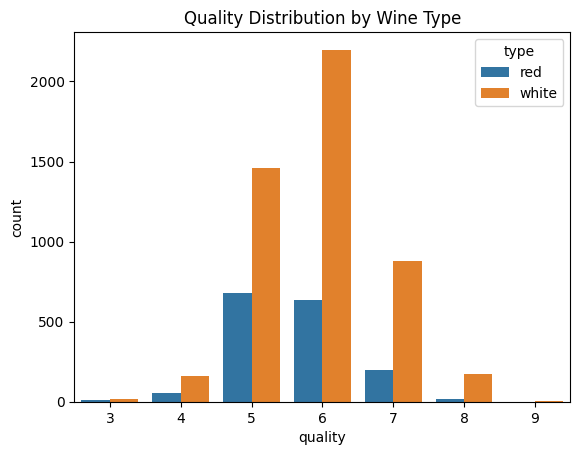

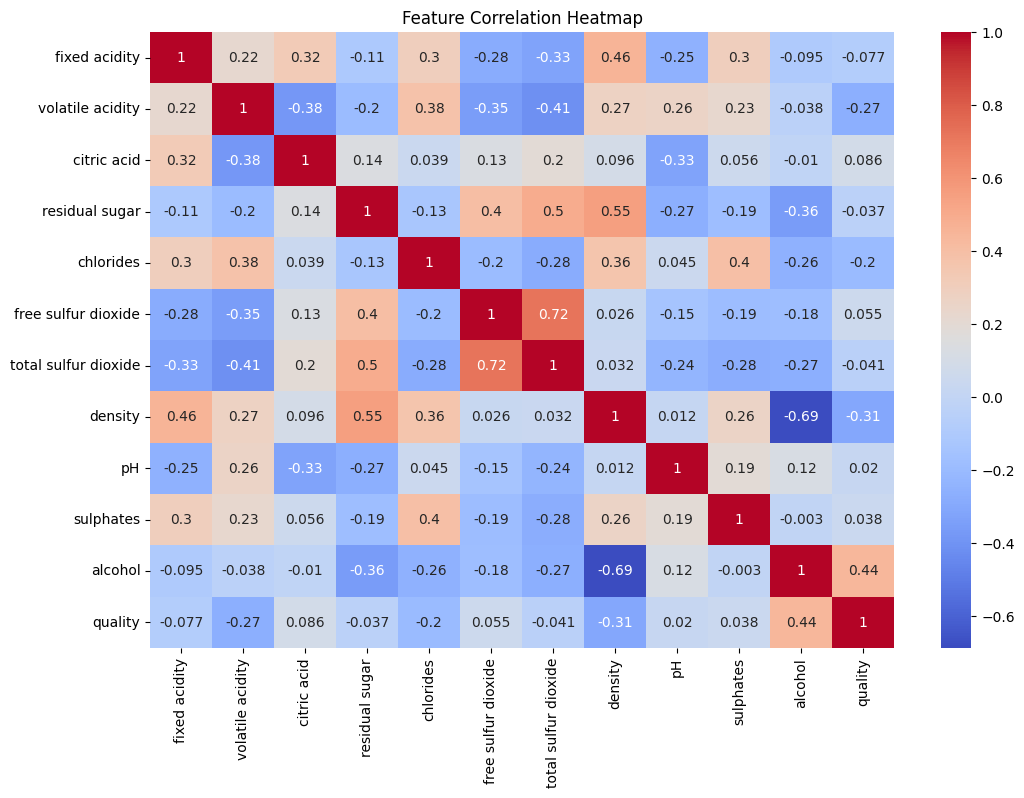

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='quality', hue='type')
plt.title('Quality Distribution by Wine Type')
plt.show()

corr = df.drop(columns=['type']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Encode wine type
df['type'] = df['type'].map({'red': 0, 'white': 1})

# Features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Stratified split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=42)



In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_val)
print("DummyClassifier")
print(classification_report(y_val, dummy_pred))
dummy_acc = accuracy_score(y_val, dummy_pred)
dummy_f1 = f1_score(y_val, dummy_pred, average='macro')

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
print("Logistic Regression")
print(classification_report(y_val, lr_pred))
lr_acc = accuracy_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred, average='macro')

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
print("Random Forest")
print(classification_report(y_val, rf_pred))
rf_acc = accuracy_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred, average='macro')


DummyClassifier
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00       321
           6       0.44      1.00      0.61       425
           7       0.00      0.00      0.00       162
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.44       975
   macro avg       0.06      0.14      0.09       975
weighted avg       0.19      0.44      0.26       975

Logistic Regression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        32
           5       0.62      0.59      0.61       321
           6       0.51      0.76      0.61       425
           7       0.46      0.10      0.17       162
           8       0.00      0.00      0.0

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train_enc)
xgb_pred = xgb.predict(X_val)
print("XGBoost")
print(classification_report(y_val_enc, xgb.predict(X_val)))
xgb_acc = accuracy_score(y_val_enc, xgb_pred)
xgb_f1 = f1_score(y_val_enc, xgb_pred, average='macro')

XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.42      0.16      0.23        32
           2       0.70      0.70      0.70       321
           3       0.65      0.75      0.70       425
           4       0.70      0.61      0.65       162
           5       0.90      0.31      0.46        29
           6       0.00      0.00      0.00         1

    accuracy                           0.67       975
   macro avg       0.48      0.36      0.39       975
weighted avg       0.67      0.67      0.67       975



In [11]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

In [12]:
df_red = pd.read_csv("wine_data/winequality-red.csv", sep=';')
df_white = pd.read_csv("wine_data/winequality-white.csv", sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red, df_white], ignore_index=True)

In [13]:
# Encode wine type
df['type'] = df['type'].map({'red': 0, 'white': 1})

# Features and target
x_data = df.drop("quality", axis=1)
y_data = df["quality"]

In [14]:

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому:', x_data.iloc[0])
print('Класс:', y_data.iloc[0])


Размерность x_data - (6497, 12)
Размерность y_data - (6497,)

Данные по первому: fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
type                     0.0000
Name: 0, dtype: float64
Класс: 5


In [15]:
print('Метки:', y_data.unique())

Метки: [5 6 7 4 8 3 9]


In [16]:
# Перевод в one hot encoding
y_data -= 3
n_classes = len(np.unique(y_data))
y_data = utils.to_categorical(y_data, num_classes=n_classes)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(5262, 12)
(5262, 7)

(585, 12)
(585, 7)


In [17]:
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387 (9.32 KB)

 Trainable params: 2,387 (9.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2720 - loss: 3.7021 - val_accuracy: 0.4154 - val_loss: 1.4775
Epoch 2/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4602 - loss: 1.4162 - val_accuracy: 0.4256 - val_loss: 1.3293
Epoch 3/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4608 - loss: 1.3096 - val_accuracy: 0.4291 - val_loss: 1.2703
Epoch 4/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4772 - loss: 1.2445 - val_accuracy: 0.4222 - val_loss: 1.2320
Epoch 5/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4704 - loss: 1.2304 - val_accuracy: 0.4513 - val_loss: 1.2006
Epoch 6/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4756 - loss: 1.2063 - val_accuracy: 0.4513 - val_loss: 1.2432
Epoch 7/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5027 - loss: 1.1790 - val_accuracy: 0.4598 - val_loss: 1.1799
Epoch 8/500
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4811 - loss: 1.1733 - val_acc

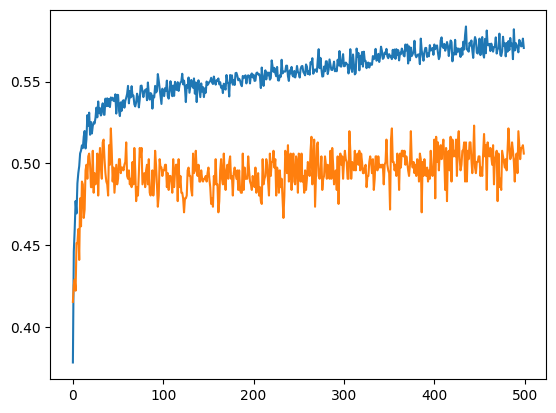

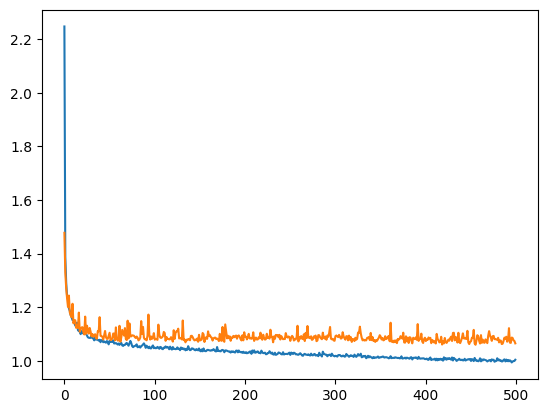

In [18]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 500,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
model.evaluate(x_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 1.1139 


[1.0770586729049683, 0.5261538624763489]

In [20]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Предсказано - 3, было 4, False
Предсказано - 3, было 4, False
Предсказано - 3, было 2, False
Предсказано - 2, было 1, False
Предсказано - 2, было 3, False
Предсказано - 3, было 3, True
Предсказано - 3, было 2, False
Предсказано - 4, было 5, False
Предсказано - 3, было 4, False
Предсказано - 2, было 2, True
Предсказано - 3, было 3, True
Предсказано - 3, было 3, True
Предсказано - 4, было 5, False
Предсказано - 3, было 4, False
Предсказано - 3, было 4, False
Предсказано - 3, было 2, False
Предсказано - 2, было 3, False
Предсказано - 3, было 4, False
Предсказано - 3, было 3, True
Предсказано - 3, было 3, True
Предсказано - 3, было 2, False
Предсказано - 2, было 3, False
Предсказано - 2, было 2, True
Предсказано - 3, было 3, True
Предсказано - 2, было 2, True
Предсказано - 3, было 3, True
Предсказано - 3, было 3, True
Предсказано - 2, было 3, False
Предсказано - 2, было 2, True
Предсказано - 3, было 3, True
Предсказано - 3, было 4, False
Предсказано -

In [23]:
# Предсказания модели на валидационной выборке
nn_probs = model.predict(x_val)
nn_pred = np.argmax(nn_probs, axis=1)

# Преобразование y_val из one-hot в числа
y_val_labels = np.argmax(y_val, axis=1)

# Accuracy и F1
nn_acc = accuracy_score(y_val_labels, nn_pred)
nn_f1 = f1_score(y_val_labels, nn_pred, average='macro')



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [24]:
# 5. Сравнение
results = {
    "DummyClassifier": (dummy_acc, dummy_f1),
    "Logistic Regression": (lr_acc, lr_f1),
    "Random Forest": (rf_acc, rf_f1),
    "Neural Network": (nn_acc, nn_f1)
}

print("\nСравнение моделей (accuracy, macro F1):")
for name, (acc, f1) in results.items():
    print(f"{name}: Accuracy={acc:.4f}, Macro F1={f1:.4f}")

# Выбираем лучшую модель по Macro F1 (можно поменять на accuracy)
best_model_name = max(results, key=lambda k: results[k][1])
best_acc, best_f1 = results[best_model_name]

print(f"\nЛучшая модель: {best_model_name} с Macro F1 = {best_f1:.4f} и Accuracy = {best_acc:.4f}")



Сравнение моделей (accuracy, macro F1):
DummyClassifier: Accuracy=0.4359, Macro F1=0.0867
Logistic Regression: Accuracy=0.5415, Macro F1=0.1978
Random Forest: Accuracy=0.7108, Macro F1=0.3888
Neural Network: Accuracy=0.5060, Macro F1=0.2787

Лучшая модель: Random Forest с Macro F1 = 0.3888 и Accuracy = 0.7108


In [62]:
df_red = pd.read_csv("wine_data/winequality-red.csv", sep=';')
df_white = pd.read_csv("wine_data/winequality-white.csv", sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red, df_white], ignore_index=True)

In [63]:
# Encode wine type
df['type'] = df['type'].map({'red': 0, 'white': 1})

# Features and target
x_data = df.drop("quality", axis=1)
y_data = df["quality"]

In [64]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [59]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42, k_neighbors=2)
# X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [66]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=25,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_val_scaled)

In [67]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("Random Forest Classifier (Improved):")
print(classification_report(y_val, rf_pred))
print("Accuracy:", accuracy_score(y_val, rf_pred))
print("Macro F1-score:", f1_score(y_val, rf_pred, average='macro'))

Random Forest Classifier (Improved):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.67      0.19      0.29        32
           5       0.73      0.75      0.74       321
           6       0.69      0.77      0.73       425
           7       0.74      0.68      0.71       162
           8       0.90      0.31      0.46        29
           9       0.00      0.00      0.00         1

    accuracy                           0.71       975
   macro avg       0.53      0.39      0.42       975
weighted avg       0.71      0.71      0.70       975

Accuracy: 0.7117948717948718
Macro F1-score: 0.4184229430929659


In [68]:
# Save model and scaler
import joblib

joblib.dump(rf, "final_wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']